# Try to identify B73 and BTx623 Orthologs
Study orthologous expression patterns<br>
Which genes are similarly expressed in time?<br>
Which genes are not similarly expressed in time?<br>

In [1]:
#set wd
setwd("/Users/Home/Desktop/BLIND/B73_BTx623_orth")

## Load maize and sorghum data with prior ETU measures
filter gene set by precalculated gene orthology
<br> try linear correlation methods to compare expression v ETU


In [2]:
#load maize count data
#create a count matrix from htseq count files
file_names <- list.files(path="./B73_htseq", pattern = "*.txt") # create a list of all txt files in the "edgeR" folder
file_paths <- list.files(path="./B73_htseq", pattern = "*.txt", full.names=T) # create a list of all txt files' full locations in the "edgeR" folder

counts <- read.table(file_paths[1], sep="\t", header=F, row.names=1) # start by reading the first file
colnames(counts) <- c(file_names[1]) # name the first column
for (f in 2:length(file_paths)) { # loop over all the rest of the files
new_file <- read.table(file_paths[f], sep="\t", header=F, row.names=1)
print ("Merging file...")
counts <- cbind(counts, new_file) # add on the new column
colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}

B73_count <- head(counts,-5) #remove last 5 lines, describing reads that were not attributed to gene models

[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."


In [3]:
#load sorghum count data
#create a count matrix from htseq count files
file_names <- list.files(path="./BTx623_htseq", pattern = "*.txt") # create a list of all txt files in the "edgeR" folder
file_paths <- list.files(path="./BTx623_htseq", pattern = "*.txt", full.names=T) # create a list of all txt files' full locations in the "edgeR" folder

counts <- read.table(file_paths[1], sep="\t", header=F, row.names=1) # start by reading the first file
colnames(counts) <- c(file_names[1]) # name the first column
for (f in 2:length(file_paths)) { # loop over all the rest of the files
new_file <- read.table(file_paths[f], sep="\t", header=F, row.names=1)
print ("Merging file...")
counts <- cbind(counts, new_file) # add on the new column
colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}

BTx623_count <- head(counts,-5) #remove last 5 lines, describing reads that were not attributed to gene models

[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Mergi

In [4]:
#rename sorghum genes to trim ".v3.2"
# current SbGIDS
old.rownames <- rownames(BTx623_count)
head(old.rownames)

# chop off extra bit
simple.rownames <- substr(old.rownames,1,nchar(old.rownames)-5)
head(simple.rownames)


[1] "Sobic.001G000100.v3.2" "Sobic.001G000200.v3.2" "Sobic.001G000300.v3.2"
[4] "Sobic.001G000400.v3.2" "Sobic.001G000501.v3.2" "Sobic.001G000700.v3.2"

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000300" "Sobic.001G000400"
[5] "Sobic.001G000501" "Sobic.001G000700"

In [5]:
#rename
rownames (BTx623_count) <- simple.rownames
head(rownames(BTx623_count))

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000300" "Sobic.001G000400"
[5] "Sobic.001G000501" "Sobic.001G000700"

In [6]:
## create VSD objects for B73 and BTx623
require(DESeq2)

#B73
dds.vsd <- DESeqDataSetFromMatrix(countData = B73_count,
                                colData = data.frame(colnames(B73_count)),
                                design = ~ 1,
                                tidy = F)
dds.vsd <- estimateSizeFactors(dds.vsd)
dds.vsd <- dds.vsd[ rowSums(counts(dds.vsd, normalized=TRUE) >= 5) > 3, ] #only consider detected genes, >= 5 RPM in more than 3 tissues
dds.vsd <- estimateDispersions(dds.vsd)
vsd <- varianceStabilizingTransformation(dds.vsd)
vsdB73 <- assay(vsd)

#BTx623
dds.vsd <- DESeqDataSetFromMatrix(countData = BTx623_count,
                                colData = data.frame(colnames(BTx623_count)),
                                design = ~ 1,
                                tidy = F)
dds.vsd <- estimateSizeFactors(dds.vsd)
dds.vsd <- dds.vsd[ rowSums(counts(dds.vsd, normalized=TRUE) >= 5) > 3, ] #only consider detected genes, >= 5 RPM in more than 3 tissues
dds.vsd <- estimateDispersions(dds.vsd)
vsd <- varianceStabilizingTransformation(dds.vsd)
vsdBTx623 <- assay(vsd)


Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.

In [7]:
#load ETU data for B73 and BTx623
B73_factors <- read.table("./B73_ETU_factors.txt", sep="\t", header=T)
BTx623_factors <- read.table("./BTx623_ETU_factors.txt", sep="\t", header=T)
head(B73_factors); head(BTx623_factors)

K5_stage ETU  DAS
SHSL002_35_S35.count.txt 1        0.00 34 
SHSL002_36_S36.count.txt 1        0.00 33 
SHSL002_37_S37.count.txt 1        0.00 33 
SHSL002_33_S33.count.txt 1        0.04 34 
SHSL002_38_S38.count.txt 1        0.18 33 
SHSL002_40_S40.count.txt 1        0.39 32

K4_stage ETU  DAS panicle_height
SHSL001_47_S47.count.txt 1        0.00 61  0.359         
SHSL001_46_S46.count.txt 1        0.30 61  0.248         
SHSL001_45_S45.count.txt 1        0.59 61  0.972         
SHSL001_42_S42.count.txt 2        0.88 62  1.033         
SHSL001_43_S43.count.txt 2        1.21 62  1.386         
SHSL001_39_S39.count.txt 2        1.49 63  0.955

In [8]:
#Load gene ortholog information
orth <- read.csv("./sb3si2_intelligent.csv", header=T)
head(orth)

sorghum2         maize1        maize2  setaria22      viridis            
1 Sobic.001G000100 GRMZM2G007948 No Gene Seita.9G000900 Sevir.9G001200.1.v1
2 Sobic.001G000200 GRMZM2G007675 No Gene Seita.9G001000 Sevir.9G001300.1.v1
3 Sobic.001G000400 GRMZM2G391815 No Gene Seita.9G001100 Sevir.9G001400.1.v1
4 Sobic.001G000300 No Gene       No Gene No Gene        No Gene            
5 Sobic.001G000501 No Gene       No Gene No Gene        No Gene            
6 Sobic.001G000700 GRMZM2G077183 No Gene Seita.9G001200 Sevir.9G001500.1.v1
  dichan   oropetium                 rice    brachy      
1 No Gene  Oropetium_20150105_23638A No Gene No Gene     
2 No Gene  Oropetium_20150105_23637A No Gene Bradi1g00450
3 No Gene  Oropetium_20150105_23636A No Gene Bradi1g00460
4 No Gene  No Gene                   No Gene No Gene     
5 No Gene  No Gene                   No Gene No Gene     
6 Do020261 Oropetium_20150105_23634A No Gene Bradi1g00470
  GEvo.Link                                                                                                                                                                                                             
1 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000100;accn2=GRMZM2G007948;accn3=Seita.9G000900;accn4=Sevir.9G001200.1.v1;accn5=Oropetium_20150105_23638A;num_seqs=5;autogo=1                                  
2 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000200;accn2=GRMZM2G007675;accn3=Seita.9G001000;accn4=Sevir.9G001300.1.v1;accn5=Oropetium_20150105_23637A;accn6=Bradi1g00450;num_seqs=6;autogo=1               
3 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000400;accn2=GRMZM2G391815;accn3=Seita.9G001100;accn4=Sevir.9G001400.1.v1;accn5=Oropetium_20150105_23636A;accn6=Bradi1g00460;num_seqs=6;autogo=1               
4 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000300;num_seqs=1;autogo=1                                                                                                                                     
5 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000501;num_seqs=1;autogo=1                                                                                                                                     
6 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000700;accn2=GRMZM2G077183;accn3=Seita.9G001200;accn4=Sevir.9G001500.1.v1;accn5=Do020261;accn6=Oropetium_20150105_23634A;accn7=Bradi1g00470;num_seqs=7;autogo=1

Identify orthologs
<br>Calculate rolling avg (per 0.5 ETU?)
<br>Sort by max expression
<br>Try sorghum centric (2 maize plots)
<br>Try maize centric (duplicate sorghum as necesary)
<br>Plot as heatmap, B73-BTx623 side-by-side

In [9]:
#calculate rolling avg vsd per 'window' ETU

library (zoo)
library (ggplot2)
library (dplyr)
library (plyr)
library (magrittr)

window <- 1
bins <- seq(from=0, to=10, by=window)

vsdB73.ETU <- vsdB73
#colnames(vsdB73.ETU) <- B73_factors[colnames(vsdB73),2]
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73[1,])),]$ETU,vsdB73[1,]))
print(tapply(df$X2, cut(df$X1, bins), mean))
ddply(df, .(cut(df$X1, bins)), colwise(mean))


Warning message:
“package ‘zoo’ was built under R version 3.4.4”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objec

   (0,1]    (1,2]    (2,3]    (3,4]    (4,5]    (5,6]    (6,7]    (7,8] 
5.143410 5.472040 5.505619 5.378024 5.492737 5.546678 5.561321 5.572502 
   (8,9]   (9,10] 
5.251358 5.386146 


cut(df$X1, bins) X2      
1  (0,1]            5.143410
2  (1,2]            5.472040
3  (2,3]            5.505619
4  (3,4]            5.378024
5  (4,5]            5.492737
6  (5,6]            5.546678
7  (6,7]            5.561321
8  (7,8]            5.572502
9  (8,9]            5.251358
10 (9,10]           5.386146
11 NA               5.109870

In [10]:
geneAvg <- function(GeneExpressionSlice, ETU_df, window) {
    
    bins <- seq(from=0, to=10, by=window)   
    df <- data.frame(cbind(ETU_df[rownames(data.frame(GeneExpressionSlice)),]$ETU, GeneExpressionSlice))
    return (tapply(df$GeneExpressionSlice, cut(df$V1, bins), mean))
    
    }

In [11]:
avgB73 <- cbind(geneAvg (vsdB73[1,], B73_factors, window))
colnames(avgB73)[1]<-rownames(vsdB73)[1]

for (rowN in 2:nrow(vsdB73)) {
    avgB73 <- cbind(avgB73, geneAvg (vsdB73[rowN,], B73_factors, window))
    colnames(avgB73)[rowN]<-rownames(vsdB73)[rowN]
}
#takes a while

In [12]:
avgBTx623 <- cbind(geneAvg (vsdBTx623[1,], BTx623_factors, window))
colnames(avgBTx623)[1]<-rownames(vsdBTx623)[1]

for (rowN in 2:nrow(vsdBTx623)) {
    avgBTx623 <- cbind(avgBTx623, geneAvg (vsdBTx623[rowN,], BTx623_factors, window))
    colnames(avgBTx623)[rowN]<-rownames(vsdBTx623)[rowN]
}
#takes a while

In [13]:
library(reshape2)
tBTx623 <- data.frame(t(scale(avgBTx623)))

colnames(tBTx623) <- seq(1,10,by=1)
max_val <- data.frame(apply(tBTx623,1,FUN=which.max))
colnames(max_val) <- "Col"

max_val.O <- max_val[rev(order(max_val$Col)), , drop=F]
head(max_val.O)
tBTx623.O <- tBTx623[rownames(max_val.O),]

head(tBTx623)
head(tBTx623.O)
df_heatmap <-melt(as.matrix(tBTx623.O))
head(df_heatmap)

Col
Sobic.K043400    10 
Sobic.K031800    10 
Sobic.010G279700 10 
Sobic.010G278700 10 
Sobic.010G278200 10 
Sobic.010G277800 10

1          2          3          4             5         
Sobic.001G000100  0.2763886 -1.5792592 -0.4270865  0.1688941843 -1.5792592
Sobic.001G000200 -0.7127639  0.2202248 -0.6879917 -0.0002959792 -2.1012603
Sobic.001G000400  0.4629111 -0.3048371 -1.3651683 -0.1273310539 -1.6847152
Sobic.001G000700 -0.5423200  0.5541322 -1.3075751 -0.6529098228 -1.4884123
Sobic.001G000800 -0.8741644  0.7419755 -1.2140380  0.3525531931  0.1193915
Sobic.001G000900  2.0735909 -1.2360069 -0.3754728 -0.3106332329  1.4289345
                 6           7          8          9         10         
Sobic.001G000100  0.21117331  0.5495308  1.7845328 0.3879943  0.20709106
Sobic.001G000200  0.05077745  0.2834667  0.5067203 1.5637846  0.87733798
Sobic.001G000400  0.10268817  0.1149967  1.5667693 1.2230925  0.01159388
Sobic.001G000700 -0.21537371  0.2263141  1.1960063 0.9873629  1.24277546
Sobic.001G000800 -1.69671225  0.1473800  1.6926716 0.5069697  0.22397307
Sobic.001G000900 -0.54017433 -0.1913469 -0.3916578 0.1630796 -0.62031307

1           2           3          4           5        
Sobic.K043400     0.06016242  0.05180465 -0.8854719 -0.31746208 -1.764928
Sobic.K031800    -1.04926955 -0.49381508 -0.5286691 -0.01341788 -1.904607
Sobic.010G279700 -1.89063078 -1.27390094 -0.3439939 -0.37313950  0.365981
Sobic.010G278700  0.42238034 -0.18668874 -1.2855806 -0.65146876 -1.897004
Sobic.010G278200  0.46321873  1.12017090 -1.3583182 -0.64062665 -1.229099
Sobic.010G277800 -0.90279977 -0.10725696 -1.0862166  0.16108978 -1.782667
                 6             7           8         9         10      
Sobic.K043400    -0.2715539323  0.22586441 0.2245003 0.5526242 2.124460
Sobic.K031800     0.5584132179  0.45951822 0.5581702 1.1906280 1.223049
Sobic.010G279700 -0.0001869309  0.54705032 0.6495677 1.1435786 1.175674
Sobic.010G278700  0.5405514819  0.23023973 0.8159108 0.8100182 1.201642
Sobic.010G278200 -0.5765590019 -0.55844741 1.0550992 0.3524013 1.372161
Sobic.010G277800  0.4970997653  0.03013197 0.7855899 1.0750799 1.329949

Var1             Var2 value      
1 Sobic.K043400    1     0.06016242
2 Sobic.K031800    1    -1.04926955
3 Sobic.010G279700 1    -1.89063078
4 Sobic.010G278700 1     0.42238034
5 Sobic.010G278200 1     0.46321873
6 Sobic.010G277800 1    -0.90279977

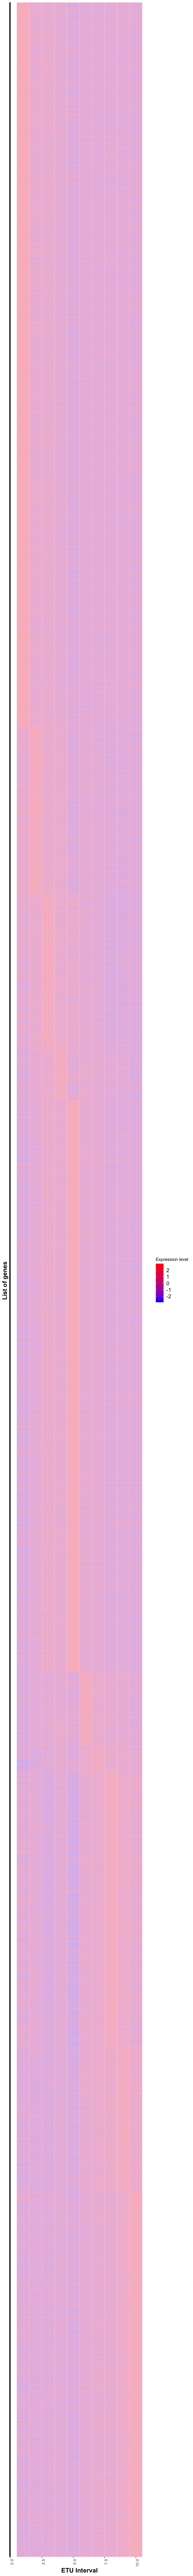

In [14]:
options(repr.plot.width=6, repr.plot.height=80)
library(ggplot2)
ggplot(df_heatmap, aes(Var2, Var1)) +
  geom_tile(aes(fill = value), color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  ylab("List of genes ") +
  xlab("ETU Interval") +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 12),
        plot.title = element_text(size=16),
        axis.title=element_text(size=14,face="bold"),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_blank()) +
  labs(fill = "Expression level" ) 


In [15]:
#try normal gene heatmap
#samples x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(avgBTx623)))
geneDistMatrix <- as.matrix( geneDists )



Loading required package: pheatmap
Warning message:
“package ‘pheatmap’ was built under R version 3.4.4”Loading required package: RColorBrewer


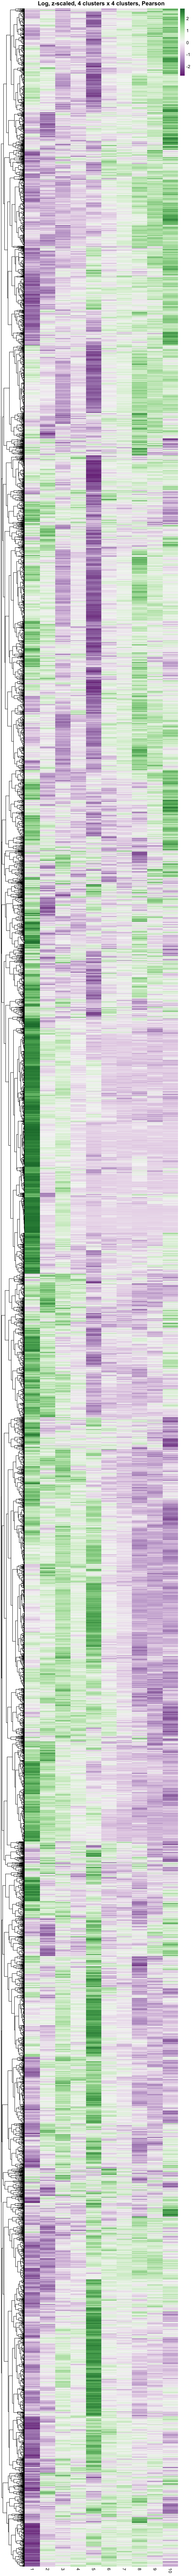

In [16]:

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tBTx623,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = T,
         col = colors,
         main="Log, z-scaled, 4 clusters x 4 clusters, Pearson")

       X1              X2          
 Min.   :0.000   Min.   :-1.52418  
 1st Qu.:1.845   1st Qu.:-0.70747  
 Median :5.125   Median :-0.06938  
 Mean   :4.841   Mean   : 0.00000  
 3rd Qu.:7.415   3rd Qu.: 0.40648  
 Max.   :9.750   Max.   : 2.34347  

x          y        
1 0.00000000 -1.021841
2 0.00975976 -1.018571
3 0.01951952 -1.015298
4 0.02927928 -1.012023
5 0.03903904 -1.008746
6 0.04879880 -1.005467

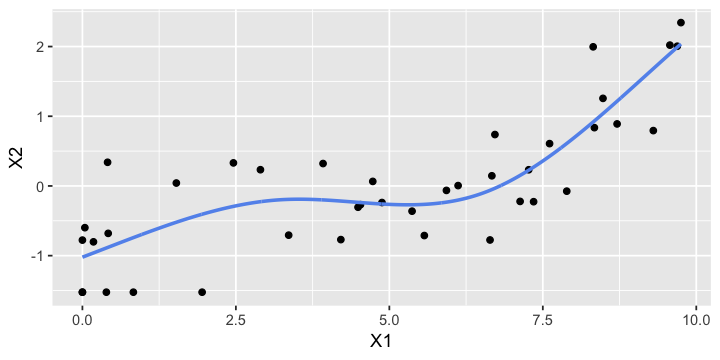

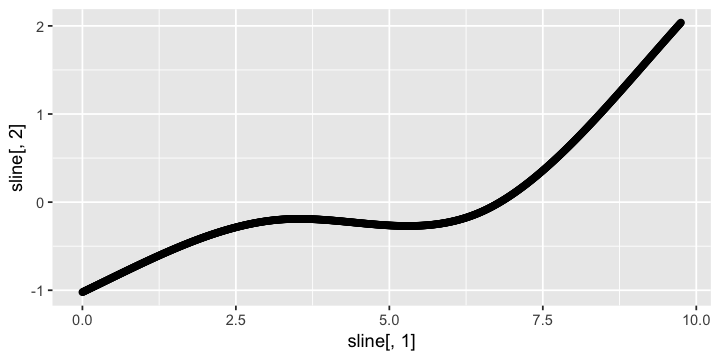

In [14]:
## TRY using smoothing spline to create full expression trajectory

vsdB73.Z <- t(scale(t(vsdB73))) #create a temp copy of VSD, z-scaled
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73.Z[2,])),]$ETU,vsdB73.Z[2,])) #grab data for gene 1
summary(df)
#fit a 5-knot b spline in ggplot -- extract interpolated values

#gives y, pred values as function of x, try extracting line values and assign to regression based on euclidian distance
p <- ggplot(data=df, aes(X1, X2)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=1000)
sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object

head(sline)
options(repr.plot.width=6, repr.plot.height=3)
p
qplot(sline[,1], sline[,2])


In [15]:
head(vsdB73)
head(t(scale(t(vsdB73))))

SHSL002_01_S1.count.txt SHSL002_02_S2.count.txt
AC148152.3_FG005 5.424691                5.900154               
AC148152.3_FG008 6.199087                6.298309               
AC148167.6_FG001 9.087430                9.047926               
AC149475.2_FG002 9.384166                9.491251               
AC149475.2_FG003 9.367993                9.606069               
AC149475.2_FG005 9.038237                8.320089               
                 SHSL002_03_S3.count.txt SHSL002_04_S4.count.txt
AC148152.3_FG005 5.331088                5.790279               
AC148152.3_FG008 6.191532                5.505118               
AC148167.6_FG001 9.407426                9.128950               
AC149475.2_FG002 9.520670                9.585393               
AC149475.2_FG003 9.572567                9.661849               
AC149475.2_FG005 8.891601                9.099413               
                 SHSL002_05_S5.count.txt SHSL002_06_S6.count.txt
AC148152.3_FG005 5.439939                5.508794               
AC148152.3_FG008 5.804842                5.508794               
AC148167.6_FG001 9.219800                9.271593               
AC149475.2_FG002 9.576897                9.643979               
AC149475.2_FG003 9.538590                9.616516               
AC149475.2_FG005 9.252479                9.159473               
                 SHSL002_07_S7.count.txt SHSL002_08_S8.count.txt
AC148152.3_FG005 5.670740                5.109870               
AC148152.3_FG008 5.340045                5.964356               
AC148167.6_FG001 9.136671                9.136880               
AC149475.2_FG002 9.677701                9.540711               
AC149475.2_FG003 9.537386                9.625680               
AC149475.2_FG005 9.165834                8.915807               
                 SHSL002_09_S9.count.txt SHSL002_10_S10.count.txt ⋯
AC148152.3_FG005 5.109870                5.109870                 ⋯
AC148152.3_FG008 5.822233                6.194215                 ⋯
AC148167.6_FG001 9.272497                9.001154                 ⋯
AC149475.2_FG002 9.285839                9.772840                 ⋯
AC149475.2_FG003 9.562745                9.864410                 ⋯
AC149475.2_FG005 8.506343                8.410764                 ⋯
                 SHSL002_31_S31.count.txt SHSL002_32_S32.count.txt
AC148152.3_FG005  5.109870                 5.591048               
AC148152.3_FG008  5.682537                 5.591048               
AC148167.6_FG001  9.011361                 8.899482               
AC149475.2_FG002  9.233203                 9.598237               
AC149475.2_FG003 10.112639                10.117558               
AC149475.2_FG005  8.902845                 8.808321               
                 SHSL002_33_S33.count.txt SHSL002_34_S34.count.txt
AC148152.3_FG005  5.311106                5.109870                
AC148152.3_FG008  5.394231                5.109870                
AC148167.6_FG001  8.975693                9.054968                
AC149475.2_FG002  9.669921                9.516733                
AC149475.2_FG003 10.038639                9.761212                
AC149475.2_FG005  8.691488                9.078130                
                 SHSL002_35_S35.count.txt SHSL002_36_S36.count.txt
AC148152.3_FG005 5.109870                 5.109870                
AC148152.3_FG008 5.339430                 5.109870                
AC148167.6_FG001 9.150077                 9.245175                
AC149475.2_FG002 9.286311                 9.324824                
AC149475.2_FG003 9.587439                 9.736513                
AC149475.2_FG005 9.088475                 8.980680                
                 SHSL002_37_S37.count.txt SHSL002_38_S38.count.txt
AC148152.3_FG005 5.109870                  5.109870               
AC148152.3_FG008 5.109870                  5.331800               
AC148167.6_FG001 9.298365                  9.154044               
AC149475.2_FG002 9.380940                  9.5

SHSL002_01_S1.count.txt SHSL002_02_S2.count.txt
AC148152.3_FG005  0.1387583               2.1309008             
AC148152.3_FG008  2.0205577               2.3434671             
AC148167.6_FG001 -0.4573357              -0.7522169             
AC149475.2_FG002 -0.1655265               0.3293864             
AC149475.2_FG003 -1.8684264              -0.7223841             
AC149475.2_FG005  0.4740566              -1.7754394             
                 SHSL002_03_S3.count.txt SHSL002_04_S4.count.txt
AC148152.3_FG005 -0.25342924              1.6705371             
AC148152.3_FG008  1.99597123             -0.2378873             
AC148167.6_FG001  1.93129718             -0.1474048             
AC149475.2_FG002  0.46535452              0.7644881             
AC149475.2_FG003 -0.88365708             -0.4538758             
AC149475.2_FG005  0.01473995              0.6656819             
                 SHSL002_05_S5.count.txt SHSL002_06_S6.count.txt
AC148152.3_FG005  0.2026459               0.4911400             
AC148152.3_FG008  0.7375297              -0.2259252             
AC148167.6_FG001  0.5307502               0.9173657             
AC149475.2_FG002  0.7252210               1.0352557             
AC149475.2_FG003 -1.0472122              -0.6720946             
AC149475.2_FG005  1.1451401               0.8538112             
                 SHSL002_07_S7.count.txt SHSL002_08_S8.count.txt
AC148152.3_FG005  1.16968021             -1.18031253            
AC148152.3_FG008 -0.77510024              1.25665247            
AC148167.6_FG001 -0.08977124             -0.08820894            
AC149475.2_FG002  1.19111002              0.55797854            
AC149475.2_FG003 -1.05300988             -0.62798174            
AC149475.2_FG005  0.87373444              0.09056069            
                 SHSL002_09_S9.count.txt SHSL002_10_S10.count.txt ⋯
AC148152.3_FG005 -1.1803125              -1.1803125               ⋯
AC148152.3_FG008  0.7941297               2.0047027               ⋯
AC148167.6_FG001  0.9241131              -1.1013498               ⋯
AC149475.2_FG002 -0.6199700               1.6308114               ⋯
AC149475.2_FG003 -0.9309380               0.5212044               ⋯
AC149475.2_FG005 -1.1920253              -1.4914148               ⋯
                 SHSL002_31_S31.count.txt SHSL002_32_S32.count.txt
AC148152.3_FG005 -1.18031253               0.83577729             
AC148152.3_FG008  0.33950164               0.04176214             
AC148167.6_FG001 -1.02515585              -1.86029087             
AC149475.2_FG002 -0.86323891               0.82384756             
AC149475.2_FG003  1.71611878               1.73979946             
AC149475.2_FG005  0.04996072              -0.24612342             
                 SHSL002_33_S33.count.txt SHSL002_34_S34.count.txt
AC148152.3_FG005 -0.3371547               -1.18031253             
AC148152.3_FG008 -0.5987594               -1.52417887             
AC148167.6_FG001 -1.2914064               -0.69965333             
AC149475.2_FG002  1.1551487                0.44715993             
AC149475.2_FG003  1.3599036                0.02443697             
AC149475.2_FG005 -0.6120873                0.59901524             
                 SHSL002_35_S35.count.txt SHSL002_36_S36.count.txt
AC148152.3_FG005 -1.18031253              -1.18031253             
AC148152.3_FG008 -0.77710034              -1.52417887             
AC148167.6_FG001  0.01029649               0.72016620             
AC149475.2_FG002 -0.61778555              -0.43979041             
AC149475.2_FG003 -0.81206370              -0.09445888             
AC149475.2_FG005  0.63142024               0.29376652             
                 SHSL002_37_S37.count.txt SHSL002_38_S38.count.txt
AC148152.3_FG005 -1.18031253              -1.18031253             
AC148152.3_FG008 -1.52417887              -0.80193431             
AC148167.6_FG001  1.11720739               0.03990793             
AC149475.2_FG002 -0.18043883               0.6

x          y           
1 0.00000000 -0.054126417
2 0.00975976 -0.042559429
3 0.01951952 -0.031071923
4 0.02927928 -0.019663659
5 0.03903904 -0.008334394
6 0.04879880  0.002916112

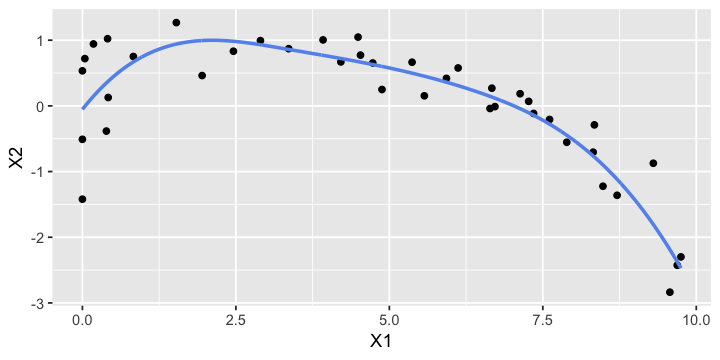

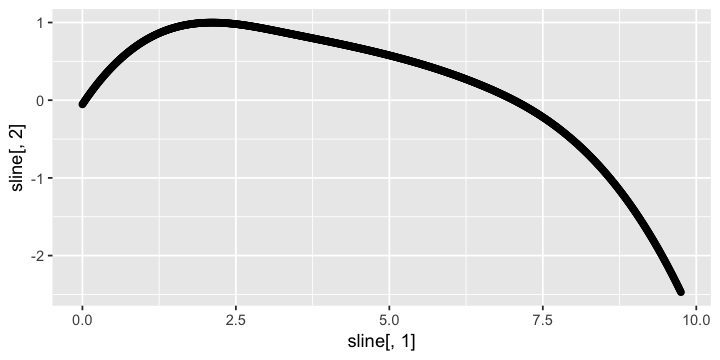

In [16]:
## TRY using smoothing spline to create full expression trajectory

vsdB73.Z <- t(scale(t(vsdB73))) #create a temp copy of VSD, z-scaled
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73.Z["GRMZM2G017087",])),]$ETU,vsdB73.Z["GRMZM2G017087",])) #grab data for gene 1

#fit a 5-knot b spline in ggplot -- extract interpolated values

#gives y, pred values as function of x, try extracting line values and assign to regression based on euclidian distance
p <- ggplot(data=df, aes(X1, X2)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=1000)
sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object

head(sline)
options(repr.plot.width=6, repr.plot.height=3)
p
qplot(sline[,1], sline[,2])


In [17]:
#now as a function that can process all genes
geneSpline <- function(GeneExpressionSlice, ETU_df, N_interpol) {
    require(ggplot2)
    
    df <- data.frame(cbind(ETU_df[rownames(data.frame(GeneExpressionSlice)),]$ETU, GeneExpressionSlice))
    p <- ggplot(data=df, aes(V1, GeneExpressionSlice)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=N_interpol)
    sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object
    
    return (sline)
    
    }

In [49]:
N_interpol <- 100

vsdB73.spline <- vsdB73.Z
splineB73 <- geneSpline (vsdB73.spline[1,], B73_factors, N_interpol)
colnames(splineB73)[2]<-rownames(vsdB73.spline)[1]

for (rowN in 2:nrow(vsdB73)) {
    splineB73 <- cbind(splineB73, geneSpline (vsdB73.spline[rowN,], B73_factors, N_interpol)[,2])
    colnames(splineB73)[rowN+1]<-rownames(vsdB73.spline)[rowN]
}
#is this a mistake to run on all genes?
#seems like it-- let run, but work on creating list of orthologs first

In [19]:
geneSpline (vsdB73.spline["GRMZM2G017087",], B73_factors, 100)

x          y          
1   0.00000000 -0.05412642
2   0.09848485  0.05897918
3   0.19696970  0.16421486
4   0.29545455  0.26182870
5   0.39393939  0.35206882
6   0.49242424  0.43518330
7   0.59090909  0.51142026
8   0.68939394  0.58102779
9   0.78787879  0.64425398
10  0.88636364  0.70134694
11  0.98484848  0.75255477
12  1.08333333  0.79812557
13  1.18181818  0.83830743
14  1.28030303  0.87334846
15  1.37878788  0.90349675
16  1.47727273  0.92900041
17  1.57575758  0.95010754
18  1.67424242  0.96706622
19  1.77272727  0.98012457
20  1.87121212  0.98953068
21  1.96969697  0.99553266
22  2.06818182  0.99837859
23  2.16666667  0.99831659
24  2.26515152  0.99559475
25  2.36363636  0.99046116
26  2.46212121  0.98316393
27  2.56060606  0.97395117
28  2.65909091  0.96307096
29  2.75757576  0.95077141
30  2.85606061  0.93730061
⋮   ⋮          ⋮          
71  6.893939    0.05326608
72  6.992424    0.01470357
73  7.090909   -0.02577775
74  7.189394   -0.06834946
75  7.287879   -0.11318313
76  7.386364   -0.16045033
77  7.484848   -0.21032266
78  7.583333   -0.26297168
79  7.681818   -0.31856897
80  7.780303   -0.37728611
81  7.878788   -0.43929468
82  7.977273   -0.50476625
83  8.075758   -0.57387241
84  8.174242   -0.64678472
85  8.272727   -0.72367477
86  8.371212   -0.80471414
87  8.469697   -0.89007439
88  8.568182   -0.97992712
89  8.666667   -1.07444389
90  8.765152   -1.17379628
91  8.863636   -1.27815588
92  8.962121   -1.38769426
93  9.060606   -1.50258299
94  9.159091   -1.62299365
95  9.257576   -1.74909783
96  9.356061   -1.88106710
97  9.454545   -2.01907303
98  9.553030   -2.16328720
99  9.651515   -2.31388119
100 9.750000   -2.47102659

In [20]:
head(splineB73[1:10])
dim(splineB73)

x          AC148152.3_FG005 AC148152.3_FG008 AC148167.6_FG001
1 0.00000000 -1.317802        -1.021841         0.068822076    
2 0.00975976 -1.300110        -1.018571         0.049573611    
3 0.01951952 -1.282571        -1.015298         0.030489493    
4 0.02927928 -1.265183        -1.012023         0.011569178    
5 0.03903904 -1.247947        -1.008746        -0.007187875    
6 0.04879880 -1.230861        -1.005467        -0.025782208    
  AC149475.2_FG002 AC149475.2_FG003 AC149475.2_FG005 AC149475.2_FG007
1 -0.012836369     0.3038628        -0.1556767       0.8188708       
2 -0.007857336     0.3174936        -0.1518281       0.7862043       
3 -0.002975403     0.3309966        -0.1480471       0.7538351       
4  0.001809885     0.3443720        -0.1443333       0.7217621       
5  0.006498984     0.3576204        -0.1406863       0.6899843       
6  0.011092350     0.3707422        -0.1371057       0.6585004       
  AC149810.2_FG008 AC149818.2_FG001
1 -0.2308465       -0.2056052      
2 -0.2432467       -0.2051657      
3 -0.2555318       -0.2046900      
4 -0.2677022       -0.2041785      
5 -0.2797584       -0.2036314      
6 -0.2917007       -0.2030489

[1]  1000 24728

In [50]:
splineB73.RN <- splineB73[,-1]
rownames(splineB73.RN) <- as.character(splineB73[,1])
tsplineB73.RN <- data.frame(t(splineB73.RN))

In [51]:
#try gene heatmap
#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(splineB73.RN)))
geneDistMatrix <- as.matrix( geneDists )



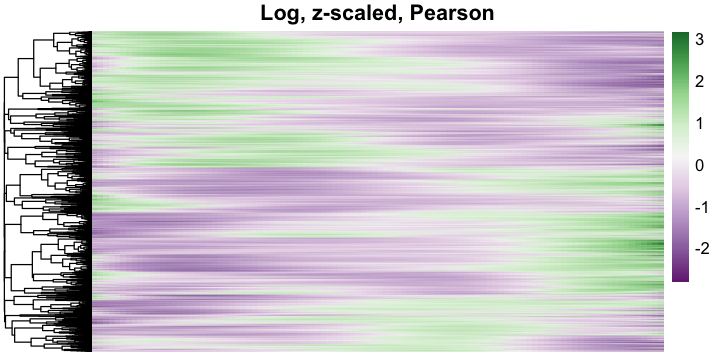

In [26]:
tsplineB73.RN <- data.frame(t(splineB73.RN))

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineB73.RN,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Pearson")

In [27]:
#same but for sorgs

In [52]:
N_interpol <- 100

vsdBTx623.Z <- t(scale(t(vsdBTx623)))
vsdBTx623.spline <- vsdBTx623.Z
splineBTx623 <- geneSpline (vsdBTx623.spline[1,], BTx623_factors, N_interpol)
colnames(splineBTx623)[2]<-rownames(vsdBTx623.spline)[1]

for (rowN in 2:nrow(vsdBTx623.Z)) {
    splineBTx623 <- cbind(splineBTx623, geneSpline (vsdBTx623.spline[rowN,], BTx623_factors, N_interpol)[,2])
    colnames(splineBTx623)[rowN+1]<-rownames(vsdBTx623.spline)[rowN]
}
#is this a mistake to run on all genes?
#seems like it-- let run, but work on creating list of orthologs first

In [53]:
splineBTx623.RN <- splineBTx623[,-1]
rownames(splineBTx623.RN) <- splineBTx623[,1]
tsplineBTx623.RN <- data.frame(t(splineBTx623.RN))

In [54]:
#try gene heatmap
#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(splineBTx623.RN)))
geneDistMatrix <- as.matrix( geneDists )


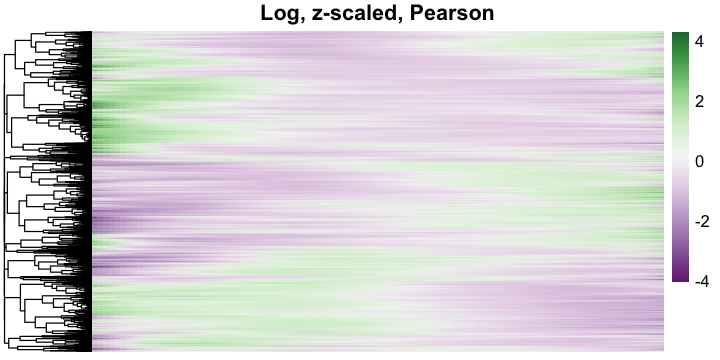

In [31]:
colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineBTx623.RN,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Pearson")

# Try the Yanai et al. method: 
To generate the phasegrams shown in Fig. 2 <br>
we first standardized the log10 profiles <br>
by subtracting the mean and dividing by <br>
the standard deviation. We next computed <br>
the first two principal components of this <br>
expression data; since the profiles were <br>
standardized, the genes form a circle. <br>
The genes are then sorted according to <br>
their angle from the origin in this space. <br>
A gene expression profile was mapped to a <br>
temporal phase (early, transition, or late) <br>
by computing the correlation with the three <br>
idealized profiles shown in Extended Data <br>
Fig. 5 and assigning it to the pattern <br>
exhibiting the highest correlation and thus <br>
best match.

In [55]:
##B73

require(magrittr)
object <- tsplineB73.RN
head(object)

pca <- object %>% prcomp(., rank.=2) 



X0          X0.0984848484848485 X0.196969696969697
AC148152.3_FG005 -1.31780236 -1.14619364         -0.98954081       
AC148152.3_FG008 -1.02184125 -0.98873954         -0.95545277       
AC148167.6_FG001  0.06882208 -0.11794131         -0.28847178       
AC149475.2_FG002 -0.01283637  0.03300919          0.06938911       
AC149475.2_FG003  0.30386280  0.43559605          0.55469601       
AC149475.2_FG005 -0.15567665 -0.11989266         -0.09063397       
                 X0.295454545454545 X0.393939393939394 X0.492424242424242
AC148152.3_FG005 -0.84719957        -0.71852563        -0.60287468       
AC148152.3_FG008 -0.92204787        -0.88859174        -0.85515129       
AC148167.6_FG001 -0.44332644        -0.58306239        -0.70823672       
AC149475.2_FG002  0.09677151         0.11562451         0.12641624       
AC149475.2_FG003  0.66159569         0.75672813         0.84052634       
AC149475.2_FG005 -0.06750855        -0.05012439        -0.03808946       
                 X0.590909090909091 X0.689393939393939 X0.787878787878788
AC148152.3_FG005 -0.49960244        -0.40806462        -0.32761692       
AC148152.3_FG008 -0.82179343        -0.78858508        -0.75559315       
AC148167.6_FG001 -0.81940653        -0.91712892        -1.00196100       
AC149475.2_FG002  0.12961480         0.12568833         0.11510494       
AC149475.2_FG003  0.91342336         0.97585221         1.02824591       
AC149475.2_FG005 -0.03101176        -0.02849925        -0.03015993       
                 X0.886363636363636 ⋯ X8.86363636363636 X8.96212121212121
AC148152.3_FG005 -0.25761505        ⋯ -0.4908815        -0.4711625       
AC148152.3_FG008 -0.72288454        ⋯  1.3362021         1.4140900       
AC148167.6_FG001 -1.07445985        ⋯  0.3263387         0.2409997       
AC149475.2_FG002  0.09833275        ⋯  0.7670590         0.7392698       
AC149475.2_FG003  1.07103749        ⋯ -0.1803666        -0.2208128       
AC149475.2_FG005 -0.03560177        ⋯ -1.0465719        -1.0812460       
                 X9.06060606060606 X9.15909090909091 X9.25757575757576
AC148152.3_FG005 -0.4371927        -0.38804319       -0.3227850       
AC148152.3_FG008  1.4922773         1.57063583        1.6490372       
AC148167.6_FG001  0.1469549         0.04387009       -0.0685890       
AC149475.2_FG002  0.7054898         0.66551341        0.6191350       
AC149475.2_FG003 -0.2695893        -0.32716259       -0.3939992       
AC149475.2_FG005 -1.1049653        -1.11689181       -1.1161874       
                 X9.35606060606061 X9.45454545454545 X9.5530303030303
AC148152.3_FG005 -0.2404894        -0.1402273        -0.02106987     
AC148152.3_FG008  1.7273530         1.8054550         1.88321476     
AC148167.6_FG001 -0.1907565        -0.3229667        -0.46555376     
AC149475.2_FG002  0.5661489         0.5063495         0.43953130     
AC149475.2_FG003 -0.4705657        -0.5573284        -0.65475382     
AC149475.2_FG005 -1.1020138        -1.0735331        -1.02990705     
                 X9.65151515151515 X9.75     
AC148152.3_FG005  0.1179117         0.2776464
AC148152.3_FG008  1.9605041         2.0371946
AC148167.6_FG001 -0.6188519        -0.7831952
AC149475.2_FG002  0.3654886         0.2840157
AC149475.2_FG003 -0.7633085        -0.8834589
AC149475.2_FG005 -0.9702976        -0.8938666

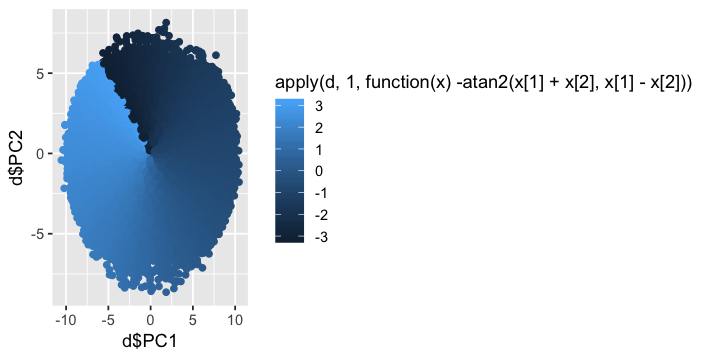

In [56]:
require(ggplot2)

d <- data.frame(PC1=pca$x[,1], PC2=pca$x[,2])

options(repr.plot.width=6, repr.plot.height=3)
qplot(x=d$PC1, y=d$PC2, color=apply(d, 1, function(x) -atan2(x[1]+x[2],x[1]-x[2])))


AC148152.3_FG005 AC148152.3_FG008 AC148167.6_FG001 AC149475.2_FG002 
       0.7934681        2.4703081        1.8260993        2.9424862 
AC149475.2_FG003 AC149475.2_FG005 
      -1.3512880        0.4236540

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


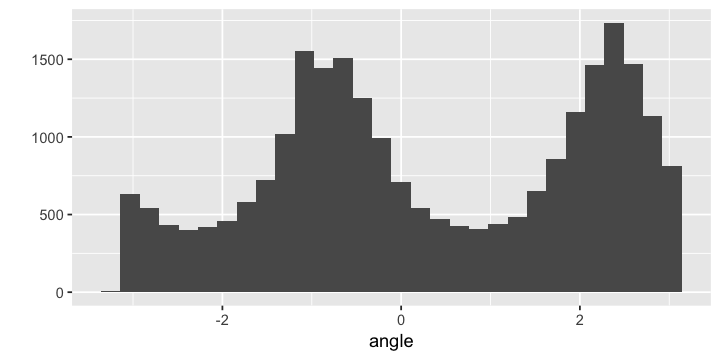

In [57]:
angle <- apply(d, 1, function(x) -atan2(x[1]+x[2],x[1]-x[2]))
head (angle)
qplot(angle)

In [58]:
require (magrittr)

object.ordered <- angle %>% 
                order %>%
                {angle[.]} %>%
                data.frame %>%
                rownames %>%
                {object[.,]} 
head(object.ordered)



X0         X0.0984848484848485 X0.196969696969697
GRMZM2G118355 0.35811531 0.25289604          0.15843403        
GRMZM2G552956 1.11757659 0.91606905          0.72922177        
GRMZM2G061626 1.33109389 1.07232333          0.83467816        
GRMZM2G065292 1.12923842 0.92575712          0.73735246        
GRMZM2G353147 0.02678928 0.01817617          0.01037377        
GRMZM2G026910 1.05484022 0.85082424          0.66228467        
              X0.295454545454545 X0.393939393939394 X0.492424242424242
GRMZM2G118355 0.074228497        -0.0002213388      -0.065416255      
GRMZM2G552956 0.556540852         0.3975323919       0.251702498      
GRMZM2G061626 0.617358815         0.4195657161       0.240499301      
GRMZM2G065292 0.563484419         0.4036129926       0.257198171      
GRMZM2G353147 0.003334844        -0.0029878106      -0.008641412      
GRMZM2G026910 0.488634942         0.3292884951       0.183658767      
              X0.590909090909091 X0.689393939393939 X0.787878787878788
GRMZM2G118355 -0.12185703        -0.170044450       -0.21047929       
GRMZM2G552956  0.11855728        -0.002397171       -0.11165474       
GRMZM2G061626  0.07936000        -0.064651751       -0.19233552       
GRMZM2G065292  0.12369995         0.002578309       -0.10670675       
GRMZM2G353147 -0.01367318        -0.018130320       -0.02206006       
GRMZM2G026910  0.05115920        -0.068796780       -0.17679572       
              X0.886363636363636 ⋯ X8.86363636363636 X8.96212121212121
GRMZM2G118355 -0.24366232        ⋯ 1.30195451        1.3003768        
GRMZM2G552956 -0.20970932        ⋯ 0.06386704        0.1284000        
GRMZM2G061626 -0.30449088        ⋯ 0.48280869        0.4596549        
GRMZM2G065292 -0.20469524        ⋯ 0.55265410        0.5589289        
GRMZM2G353147 -0.02550961        ⋯ 0.36899670        0.3731976        
GRMZM2G026910 -0.27342420        ⋯ 1.24957856        1.3077708        
              X9.06060606060606 X9.15909090909091 X9.25757575757576
GRMZM2G118355 1.2832264         1.2494882         1.1981473        
GRMZM2G552956 0.1994137         0.2771903         0.3620117        
GRMZM2G061626 0.4260815         0.3814551         0.3251424        
GRMZM2G065292 0.5592731         0.5533063         0.5406483        
GRMZM2G353147 0.3740564         0.3713534         0.3648691        
GRMZM2G026910 1.3594210         1.4040021         1.4409870        
              X9.35606060606061 X9.45454545454545 X9.5530303030303
GRMZM2G118355 1.1281885         1.0385968         0.9283572       
GRMZM2G552956 0.4541602         0.5539177         0.6615663       
GRMZM2G061626 0.2565100         0.1749245         0.0797526       
GRMZM2G065292 0.5209186         0.4937369         0.4587230       
GRMZM2G353147 0.3543837         0.3396776         0.3205312       
GRMZM2G026910 1.4698487         1.4900602         1.5010945       
              X9.65151515151515 X9.75     
GRMZM2G118355  0.79645460        0.6418739
GRMZM2G552956  0.77738804        0.9016651
GRMZM2G061626 -0.02963918       -0.1538842
GRMZM2G065292  0.41549643        0.3636769
GRMZM2G353147  0.29672478        0.2680387
GRMZM2G026910  1.50242436        1.4935229

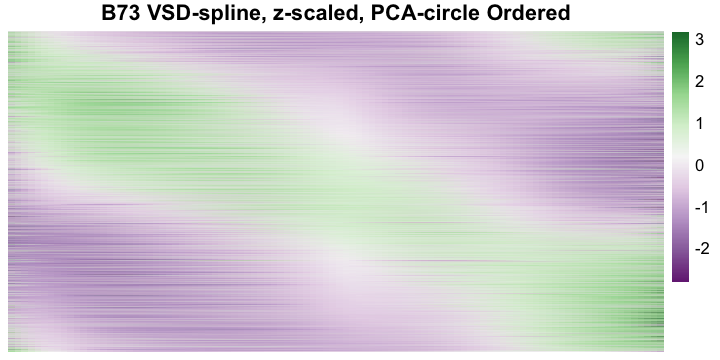

In [75]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="./B73_phasigram.pdf", he=6, wi=3)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [76]:
#add annotation for KN1 -- GRMZM2G017087
#then generalize

#pheatmap annotation is list of annotations for all row/column values
#my strat will be to take rownames, check against input list
#match input list, unchanged
#not matching input list, turn to ""
#then plot with annotation

In [59]:
to.annotate <- read.table(text="GID	name
GRMZM2G307119	BD1
GRMZM2G160917	UB2
GRMZM2G460544	UB3
GRMZM2G003927	RA1
AC233943.1_FG002	RA2
GRMZM2G014729	RA3
GRMZM2G307588	TSH4
GRMZM2G160565	BDE1/ZAG3
GRMZM2G110242	WAB1/BAD1
GRMZM2G036297	LG1
GRMZM2G060216	LG2
GRMZM2G133331	FEA4
GRMZM2G300133	TD1
GRMZM2G325850	TSH1
GRMZM2G017087	KN1", sep="\t", header=T)

require(magrittr)

#object from above
anno <- rep("", length(rownames(object.ordered)))

rep.df <- to.annotate$GID %>%
    {match(., rownames(object.ordered))} %>%
    {data.frame(index=., text=to.annotate$name)}

for (row in (1:nrow(rep.df))) {
    anno [ rep.df[row, 1] ] <- rep.df[row, 2] %>% as.character()
}

rep.df
rep.df[row, 1]
rep.df[row, 2]
anno[10550:10560]

dim(object.ordered)
length(anno)


index text     
1  13753 BD1      
2   5989 UB2      
3   4751 UB3      
4  11663 RA1      
5   9504 RA2      
6   7928 RA3      
7   5114 TSH4     
8  19766 BDE1/ZAG3
9   7165 WAB1/BAD1
10  3726 LG1      
11  2255 LG2      
12  8627 FEA4     
13 12830 TD1      
14  6508 TSH1     
15 10552 KN1

[1] 10552

[1] KN1
15 Levels: BD1 BDE1/ZAG3 FEA4 KN1 LG1 LG2 RA1 RA2 RA3 TD1 TSH1 TSH4 UB2 ... WAB1/BAD1

[1] ""    ""    "KN1" ""    ""    ""    ""    ""    ""    ""    ""

[1] 24727   100

[1] 24727

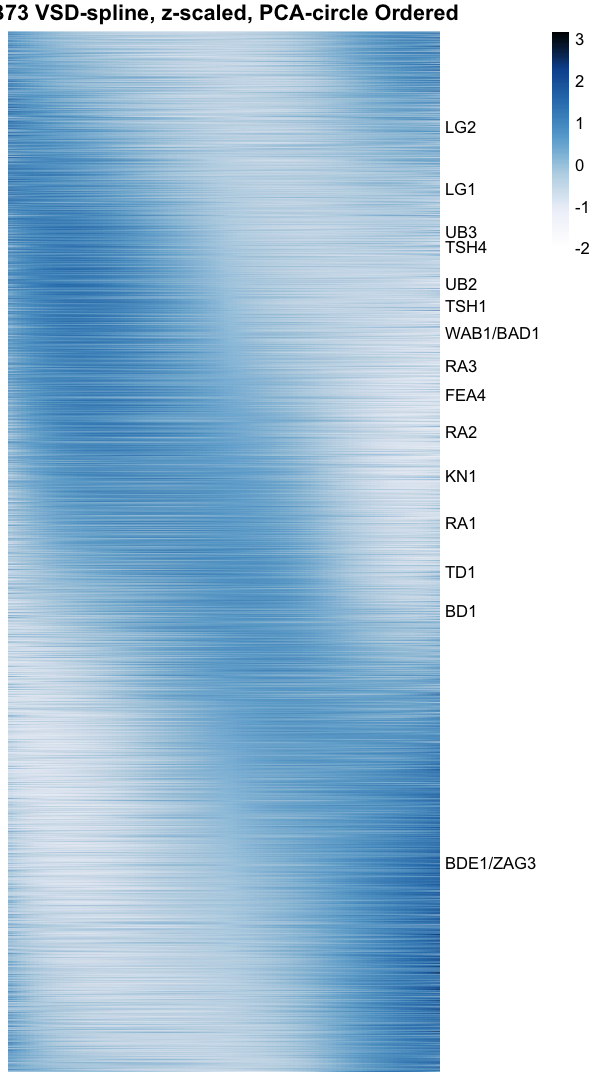

In [67]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( c("#FFFFFF","#FFFFFF",
                              "#EFF2FA","#BDD7E7",
                              "#6BADD5","#3382BD",
                              "#0C529B","#000000"))(200) #blues


options(repr.plot.width=5, repr.plot.height=9)
#pdf(file="./B73_phasigram_label3.pdf", he=14, wi=5)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [68]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( c("#FFFFFF","#FFFFFF",
                              "#EFF2FA","#BDD7E7",
                              "#6BADD5","#3382BD",
                              "#0C529B","#000000"))(200) #blues



pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         legend = FALSE,
         filename = "./B73_phasigram_label_nolegend.png",
         width = 3,
         height = 9,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")




[1] 24727

[1] "#5E4FA2" "#5D4FA2" "#5D4FA2" "#5D4FA2" "#5D4FA2" "#5D4FA2"

[1] 24727     1

row_color
GRMZM2G118355 1        
GRMZM2G552956 2        
GRMZM2G061626 3        
GRMZM2G065292 4        
GRMZM2G353147 5        
GRMZM2G026910 6

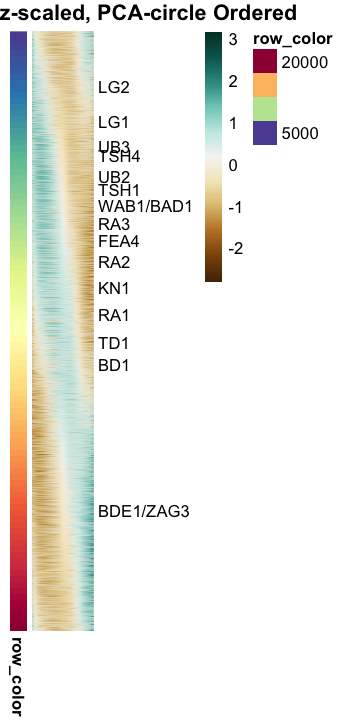

In [79]:
#I want to add a color annotation bar to each row
#to compare Zm-Sb orthologs
#for Zm, create spectral color palette with legnth that matches nrows

nrow(x = object.ordered)

row_color <- as.character(rev(colorRampPalette( brewer.pal(11, "Spectral"))(nrow(x = object.ordered))))
head(row_color)
row_anno <- data.frame('row_color' = 1:nrow(x = object.ordered))
rownames(row_anno) <- rownames(object.ordered)
dim(row_anno)
head(row_anno)

require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(11, "BrBG"))(200)

options(repr.plot.width=3, repr.plot.height=6)
#pdf(file="./B73_phasigram_label3.pdf", he=14, wi=5)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         annotation_row = row_anno, annotation_color = list ('row_color' = row_color),
         labels_row = anno,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [69]:
##BTx623

require(magrittr)
object <- tsplineBTx623.RN
head(object)

pca <- object %>% prcomp(., rank.=2) 



X0           X0.0994949494949495 X0.198989898989899
Sobic.001G000100  0.005344583 -0.10285320         -0.20084495       
Sobic.001G000200 -0.294728438 -0.30902434         -0.32259347       
Sobic.001G000400  0.088833902  0.05370384          0.01824639       
Sobic.001G000700 -0.915124117 -0.82531986         -0.74470849       
Sobic.001G000800 -1.632655125 -1.38202921         -1.15258269       
Sobic.001G000900  1.363670005  1.21186231          1.07031415       
                 X0.298484848484848 X0.397979797979798 X0.497474747474748
Sobic.001G000100 -0.28900432        -0.36770496        -0.43732055       
Sobic.001G000200 -0.33545469        -0.34762684        -0.35912880       
Sobic.001G000400 -0.01742973        -0.05321583        -0.08900319       
Sobic.001G000700 -0.67290515        -0.60952493        -0.55418297       
Sobic.001G000800 -0.94353175        -0.75409262        -0.58348148       
Sobic.001G000900  0.93868778         0.81664544         0.70384940       
                 X0.596969696969697 X0.696464646464646 X0.795959595959596
Sobic.001G000100 -0.4982247         -0.5507912         -0.5953936        
Sobic.001G000200 -0.3699794         -0.3801975         -0.3898021        
Sobic.001G000400 -0.1246831         -0.1601469         -0.1952858        
Sobic.001G000700 -0.5064944         -0.4660743         -0.4325377        
Sobic.001G000800 -0.4309145         -0.2956080         -0.1767781        
Sobic.001G000900  0.5999619          0.5046452          0.4175615        
                 X0.895454545454546 ⋯ X8.95454545454546 X9.0540404040404
Sobic.001G000100 -0.63240551        ⋯  0.3111356         0.2878152      
Sobic.001G000200 -0.39881180        ⋯  0.9525857         0.9222423      
Sobic.001G000400 -0.22999116        ⋯  0.3646271         0.3422278      
Sobic.001G000700 -0.40549994        ⋯  1.0251702         0.9908758      
Sobic.001G000800 -0.07364095        ⋯  0.5458833         0.4956665      
Sobic.001G000900  0.33837312        ⋯ -0.2007129        -0.2121095      
                 X9.15353535353535 X9.2530303030303 X9.35252525252525
Sobic.001G000100  0.2613000         0.2314461        0.1981096       
Sobic.001G000200  0.8821738         0.8318745        0.7708384       
Sobic.001G000400  0.3184779         0.2934172        0.2670856       
Sobic.001G000700  0.9477588         0.8954222        0.8334687       
Sobic.001G000800  0.4366063         0.3683101        0.2903855       
Sobic.001G000900 -0.2238758        -0.2360174       -0.2485399       
                 X9.4520202020202 X9.55151515151515 X9.6510101010101
Sobic.001G000100  0.1611466        0.1204132         0.075765457    
Sobic.001G000200  0.6985597        0.6145324         0.518250820    
Sobic.001G000400  0.2395228        0.2107688         0.180863474    
Sobic.001G000700  0.7615012        0.6791226         0.585935687    
Sobic.001G000800  0.2024399        0.1040809        -0.005084207    
Sobic.001G000900 -0.2614488       -0.2747498        -0.288448499    
                 X9.75050505050505 X9.85      
Sobic.001G000100  0.02705945       -0.02584873
Sobic.001G000200  0.40920893        0.28690090
Sobic.001G000400  0.14984657        0.11775798
Sobic.001G000700  0.48154338        0.36554850
Sobic.001G000800 -0.12544780       -0.25740244
Sobic.001G000900 -0.30255041       -0.31706117

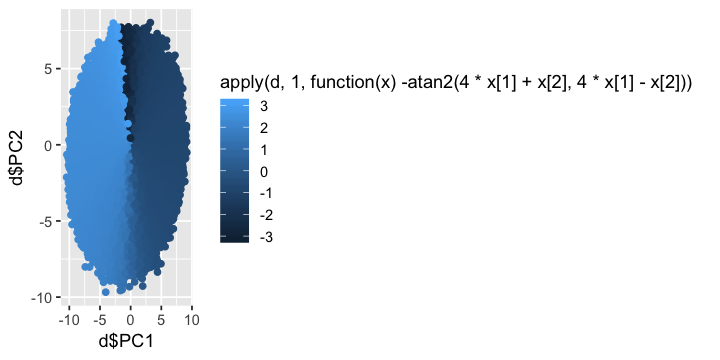

In [70]:
require(ggplot2)

d <- data.frame(PC1=pca$x[,1], PC2=pca$x[,2])

options(repr.plot.width=6, repr.plot.height=3)
qplot(x=d$PC1, y=d$PC2, color=apply(d, 1, function(x) -atan2(4*x[1]+x[2],4*x[1]-x[2])))


Sobic.001G000100 Sobic.001G000200 Sobic.001G000400 Sobic.001G000700 
       2.3345549        2.4670133        2.4760092        2.4571027 
Sobic.001G000800 Sobic.001G000900 
       2.3587695       -0.9952643

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


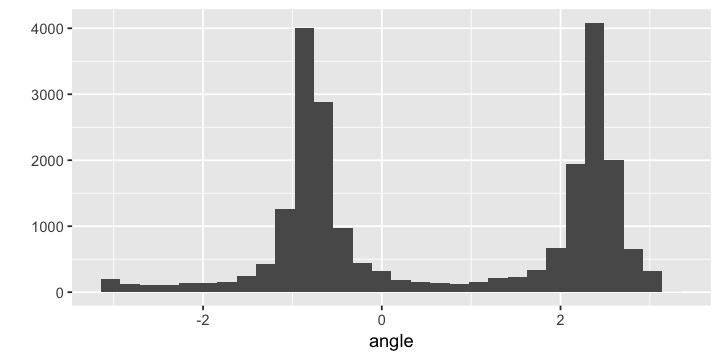

In [71]:
angle <- apply(d, 1, function(x) -atan2(4*x[1]+x[2],4*x[1]-x[2]))
head (angle)
qplot(angle)

In [72]:
require (magrittr)

object.ordered <- angle %>% 
                order %>%
                {angle[.]} %>%
                data.frame %>%
                rownames %>%
                {object[.,]} 
head(object.ordered)



X0         X0.0994949494949495 X0.198989898989899
Sobic.001G541400 0.07944787 0.1551701           0.2205703         
Sobic.003G113200 0.53799415 0.5605726           0.5753490         
Sobic.010G097100 0.41935069 0.4847860           0.5373155         
Sobic.005G005000 0.10072775 0.1984408           0.2813901         
Sobic.003G274600 1.86818928 1.6160496           1.3821958         
Sobic.001G073150 1.52989305 1.3528598           1.1852412         
                 X0.298484848484848 X0.397979797979798 X0.497474747474748
Sobic.001G541400 0.2760949          0.3221907          0.3593043         
Sobic.003G113200 0.5827298          0.5831212          0.5769296         
Sobic.010G097100 0.5775684          0.6061742          0.6237622         
Sobic.005G005000 0.3502742          0.4057915          0.4486404         
Sobic.003G274600 1.1659741          0.9667302          0.7838102         
Sobic.001G073150 1.0268086          0.8773334          0.7365870         
                 X0.596969696969697 X0.696464646464646 X0.795959595959596
Sobic.001G541400 0.3878824          0.4083716          0.4212187         
Sobic.003G113200 0.5645612          0.5464224          0.5229194         
Sobic.010G097100 0.6309616          0.6284017          0.6167120         
Sobic.005G005000 0.4795193          0.4991267          0.5081611         
Sobic.003G274600 0.6165600          0.4643255          0.3264527         
Sobic.001G073150 0.6043409          0.4803663          0.3644346         
                 X0.895454545454546 ⋯ X8.95454545454546 X9.0540404040404
Sobic.001G541400 0.4268702          ⋯  0.45661979        0.6060216      
Sobic.003G113200 0.4944586          ⋯  0.21337780        0.1616941      
Sobic.010G097100 0.5965217          ⋯  0.30715551        0.3332567      
Sobic.005G005000 0.5073208          ⋯ -0.09404458       -0.1173462      
Sobic.003G274600 0.2022876          ⋯  0.75536105        0.8264904      
Sobic.001G073150 0.2563174          ⋯  0.13783817        0.1813089      
                 X9.15353535353535 X9.2530303030303 X9.35252525252525
Sobic.001G541400  0.7703984         0.95043856       1.14683041      
Sobic.003G113200  0.1045232         0.04171259      -0.02689014      
Sobic.010G097100  0.3634181         0.39795389       0.43717844      
Sobic.005G005000 -0.1385185        -0.15727043      -0.17331052      
Sobic.003G274600  0.8983085         0.97070607       1.04357398      
Sobic.001G073150  0.2311993         0.28787680       0.35170885      
                 X9.4520202020202 X9.55151515151515 X9.6510101010101
Sobic.001G541400  1.3602623        1.5914227         1.8410000      
Sobic.003G113200 -0.1014375       -0.1820819        -0.2689760      
Sobic.010G097100  0.4814060        0.5309509         0.5861274      
Sobic.005G005000 -0.1863475       -0.1960901        -0.2022470      
Sobic.003G274600  1.1168031        1.1902842         1.2639082      
Sobic.001G073150  0.4230628        0.5023061         0.5898061      
                 X9.75050505050505 X9.85     
Sobic.001G541400  2.1096825         2.3981585
Sobic.003G113200 -0.3622721        -0.4621227
Sobic.010G097100  0.6472497         0.7146323
Sobic.005G005000 -0.2045268        -0.2026383
Sobic.003G274600  1.3375659         1.4111482
Sobic.001G073150  0.6859302         0.7910458

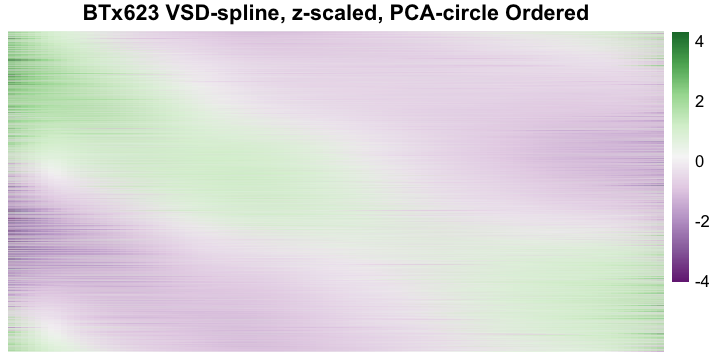

In [106]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="./BTx623_phasigram.pdf", he=6, wi=3)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [73]:
to.annotate <- read.table(text="GID	name
Sobic.002G411000	SbBD1
Sobic.007G210200	SbUB2
Sobic.007G210200	SbUB3
Sobic.002G197700	SbRA1
Sobic.003G052900	SbRA2
Sobic.002G381600	SbRA3
Sobic.002G247800	SbTSH4
Sobic.004G281000	SbBDE1/ZAG3
Sobic.002G198400	SbWAB1/BAD1
Sobic.006G247700	SbLG1
Sobic.003G363600	SbLG2
Sobic.010G110100	SbFEA4
Sobic.010G267700	SbTD1
Sobic.009G243600	SbTSH1
Sobic.001G106200	SbKN1", sep="\t", header=T)

require(magrittr)

#object from above
anno <- rep("", length(rownames(object.ordered)))

rep.df <- to.annotate$GID %>%
    {match(., rownames(object.ordered))} %>%
    {data.frame(index=., text=to.annotate$name)}

for (row in (1:nrow(rep.df))) {
    anno [ rep.df[row, 1] ] <- rep.df[row, 2] %>% as.character()
}


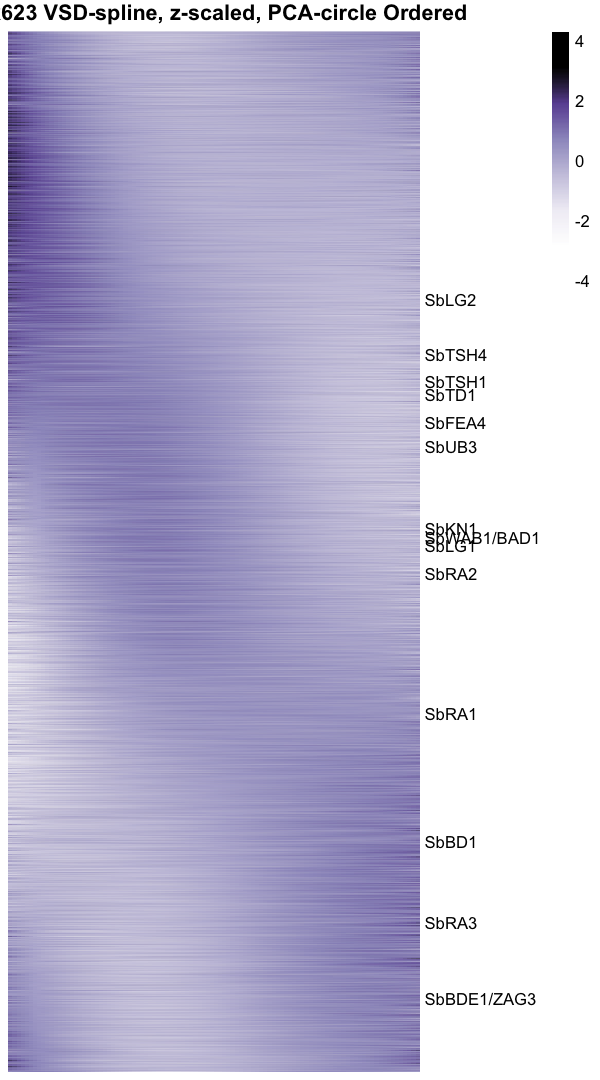

In [74]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( c("#FFFFFF","#FFFFFF",
                              "#F1EFF6","#CBC8E0",
                              "#9D99C7","#6B52A2",
                              "#000000","#000000"))(200) #purples 

options(repr.plot.width=5, repr.plot.height=9)

pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")


In [75]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( c("#FFFFFF","#FFFFFF",
                              "#F1EFF6","#CBC8E0",
                              "#9D99C7","#6B52A2",
                              "#000000","#000000"))(200) #purples

#options(repr.plot.width=3, repr.plot.height=9)

pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         legend = FALSE,
         filename = "./BTx623_phasigram_label_nolegend.png",
         width = 3,
         height = 9,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")


In [93]:
#I want to add a color annotation bar to each row
#to compare Zm-Sb orthologs
#for Sb take ortholog list and reorder according to SB_ZM dataframe below
#create spectral color palette with legnth that matches nrows
head(row_anno)
SB_row_anno <- row_anno
head(SB_row_anno)

rownames(SB_row_anno) <- row_anno %>% 
    rownames() %>%
    match(. , SB_ZM$ZM) %>%
    SB_ZM$SB[.] %>% 
    as.character()

head(SB_row_anno)

row_color
GRMZM2G118355 1        
GRMZM2G552956 2        
GRMZM2G061626 3        
GRMZM2G065292 4        
GRMZM2G353147 5        
GRMZM2G026910 6

row_color
GRMZM2G118355 1        
GRMZM2G552956 2        
GRMZM2G061626 3        
GRMZM2G065292 4        
GRMZM2G353147 5        
GRMZM2G026910 6

Warning message:
“non-unique values when setting 'row.names': ‘Sobic.001G003500’, ‘Sobic.001G004400’, ‘Sobic.001G005600’, ‘Sobic.001G007200’, ‘Sobic.001G007600’, ‘Sobic.001G008500’, ‘Sobic.001G009300’, ‘Sobic.001G010300’, ‘Sobic.001G010900’, ‘Sobic.001G011000’, ‘Sobic.001G011800’, ‘Sobic.001G012900’, ‘Sobic.001G013100’, ‘Sobic.001G014100’, ‘Sobic.001G014800’, ‘Sobic.001G015500’, ‘Sobic.001G016900’, ‘Sobic.001G017900’, ‘Sobic.001G018500’, ‘Sobic.001G018900’, ‘Sobic.001G019400’, ‘Sobic.001G023100’, ‘Sobic.001G023300’, ‘Sobic.001G023400’, ‘Sobic.001G023500’, ‘Sobic.001G023800’, ‘Sobic.001G025101’, ‘Sobic.001G026500’, ‘Sobic.001G026700’, ‘Sobic.001G028400’, ‘Sobic.001G029200’, ‘Sobic.001G029700’, ‘Sobic.001G030300’, ‘Sobic.001G030400’, ‘Sobic.001G031400’, ‘Sobic.001G031700’, ‘Sobic.001G031800’, ‘Sobic.001G031900’, ‘Sobic.001G032800’, ‘Sobic.001G033300’, ‘Sobic.001G033400’, ‘Sobic.001G034100’, ‘Sobic.001G034300’, ‘Sobic.001G034500’, ‘Sobic.001G034600’, ‘Sobic.001G034700’, ‘Sobic.001G035100’

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = value): duplicate 'row.names' are not allowed


In [ ]:


nrow(x = object.ordered)

row_color <- as.character(rev(colorRampPalette( brewer.pal(11, "Spectral"))(nrow(x = object.ordered))))
head(row_color)
row_anno <- data.frame('row_color' = 1:nrow(x = object.ordered))
rownames(row_anno) <- rownames(object.ordered)
dim(row_anno)
head(row_anno)

require(pheatmap)
require(RColorBrewer)


colors <- colorRampPalette( brewer.pal(11, "BrBG"))(200)

options(repr.plot.width=3, repr.plot.height=6)
#pdf(file="./BTx623_phasigram_label.pdf", he=14, wi=5)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [47]:
#try some dynamic time warping
#not sure how to fork my notebook...
#will duplecate a lot of code below, from previous attempts

#general flow
#create maize-centered list of sb orthologs (don't really care about sub genome)
#slice out z-scaled expression values for each maize-sorghum gene pair
#run dtw
#build DF of maize ID, sorghum ID, dtw




In [63]:
#using scaled, transposed matrix from above
require(magrittr)

maize_genes <- tsplineB73.RN %>%
                rownames() 
sorghum_genes <- tsplineBTx623.RN %>%
                rownames() 


length(maize_genes)
length(sorghum_genes)

[1] 24727

[1] 22755

In [64]:
#using orthology matrix, orth from above
#create maize1 and maize2 subsets of orthology table
maize1 <- orth[(orth$maize1!="No Gene"),]
maize2 <- orth[(orth$maize2!="No Gene"),]
dim(maize1)
dim(maize2)
#remember, some maize genes match multiple sorghum genes-- will this be a problem?

[1] 16965    10

[1] 10891    10

In [65]:
maize1_orth <- maize_genes %>% 
      match(. , orth$maize1) %>%
      orth[.,] #find maize nonNAs
SB_ZM1 <- data.frame(SB = maize1_orth$sorghum2, ZM = maize1_orth$maize1) %>% na.omit ()
head(SB_ZM1)

'GRMZM2G060216' %in% maize_genes
'GRMZM2G060216' %in% orth$maize1
'GRMZM2G060216' %in% SB_ZM1$ZM


SB               ZM           
909 Sobic.005G058900 GRMZM2G000014
910 Sobic.006G219600 GRMZM2G000039
911 Sobic.006G220200 GRMZM2G000052
913 Sobic.006G240300 GRMZM2G000093
914 Sobic.006G027200 GRMZM2G000114
915 Sobic.002G001700 GRMZM2G000126

[1] TRUE

[1] TRUE

[1] TRUE

In [66]:
maize2_orth <- maize_genes %>% 
      match(. , orth$maize2) %>%
      orth[.,] #find maize orthologs
SB_ZM2 <- data.frame(SB = maize2_orth$sorghum2, ZM = maize2_orth$maize2) %>% na.omit ()
head(SB_ZM2)

SB               ZM           
912 Sobic.008G081800 GRMZM2G000076
917 Sobic.010G052700 GRMZM2G000158
919 Sobic.003G240700 GRMZM2G000177
920 Sobic.001G351800 GRMZM2G000209
921 Sobic.001G352200 GRMZM2G000219
924 Sobic.006G137600 GRMZM2G000245

In [67]:
dim(SB_ZM1)
dim(SB_ZM2)
SB_ZM <- rbind(SB_ZM1, SB_ZM2)
dim(SB_ZM)

[1] 11879     2

[1] 7298    2

[1] 19177     2

In [ ]:
#now try using DTW on orthologous pairs

In [53]:
length(maize_genes)
#index <- 920
#maize_genes[index]

#maize_gene <- index %>%
#{maize_genes[.]} 
#maize_gene <- 'GRMZM2G017087' #kn1
maize_gene <- 'GRMZM2G014729' #ra3
#maize_gene <- 'GRMZM2G005624' #gt1

#match(maize_gene , SB_ZM$ZM)

sorghum_gene <- maize_gene %>%
match(. , SB_ZM$ZM) %>%
SB_ZM$SB[.] %>% 
as.character()

print(maize_gene)
print(sorghum_gene)

ZM_slice <- tsplineB73.RN[maize_gene,]
colnames(ZM_slice) <- c(1:100)
SB_slice <- tsplineBTx623.RN[sorghum_gene,]
colnames(SB_slice) <- c(1:100)

ZM_slice
SB_slice

#try running dtw for first orthogroup
require(dtw)

dtw.test <- dtw(t(ZM_slice), t(SB_slice), keep=T, 
                open.end=T, open.begin=T, step.pattern=asymmetric)

#options(repr.plot.width=3, repr.plot.height=3)
pdf(file="./DTW_RA3.pdf", he=3, wi=3)
plot(dtw.test, type="twoway", offset=-1, lwd=2)
dev.off()
dtw.test
dtw.test$distance
dtw.test$normalizedDistance

[1] 24727

[1] "GRMZM2G014729"
[1] "Sobic.002G381600"


1          2          3          4          5         6      
GRMZM2G014729 -0.8876038 -0.5961473 -0.3226556 -0.0666897 0.1721892 0.39442
              7         8         9         10      ⋯ 91        92        
GRMZM2G014729 0.6004416 0.7906928 0.9656126 1.12564 ⋯ -0.379704 -0.3976882
              93        94        95         96         97         98       
GRMZM2G014729 -0.423414 -0.457477 -0.5004732 -0.5529984 -0.6156484 -0.689019
              99         100       
GRMZM2G014729 -0.7737061 -0.8703054

1       2         3           4         5          6         
Sobic.002G381600 0.28445 0.1163295 -0.03789946 -0.178731 -0.3066591 -0.4221778
                 7          8          9          10         ⋯ 91      
Sobic.002G381600 -0.5257813 -0.6179636 -0.6992187 -0.7700407 ⋯ 1.122035
                 92       93       94       95       96       97       98      
Sobic.002G381600 1.181905 1.242489 1.303744 1.365626 1.428092 1.491096 1.554596
                 99       100     
Sobic.002G381600 1.618548 1.682907

Loading required package: dtw
Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:DelayedArray’:

    as.matrix

The following object is masked from ‘package:IRanges’:

    as.matrix

The following object is masked from ‘package:S4Vectors’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loaded dtw v1.18-1. See ?dtw for help, citation("dtw") for use in publication.



pdf 
  2

DTW alignment object
 Alignment size (query x reference): 100 x 100
 Call: dtw(x = t(ZM_slice), y = t(SB_slice), step.pattern = asymmetric, 
 Call:     keep.internals = T, open.end = T, open.begin = T)

[1] 57.9267

[1] 0.579267

In [54]:
DTW_results <- data.frame(ZM = character(0), SB = character(0), DTW=numeric(0), DTW_norm=numeric(0))

for (index in 1:length(SB_ZM$ZM)) {
    
    maize_gene <- index %>%
    {SB_ZM$ZM[.]} %>%
    as.character()

    sorghum_gene <- index %>%
    SB_ZM$SB[.] %>% 
    as.character()

    #print(maize_gene)
    #print(sorghum_gene)
    
    ZM_slice <- tsplineB73.RN[maize_gene,]
    colnames(ZM_slice) <- c(1:100)
    SB_slice <- tsplineBTx623.RN[sorghum_gene,]
    colnames(SB_slice) <- c(1:100)
        
    if (is.na( ZM_slice[1] ) | is.na( SB_slice[1] )) {
        result <- data.frame(ZM=maize_gene, SB=sorghum_gene, DTW=NA, DTW_norm=NA)
        DTW_results <- rbind(DTW_results, result)
    }
    else {
        require(dtw)
        dtw.test <- dtw(t(ZM_slice), t(SB_slice), keep=F,
                       open.end=T, open.begin=T, step.pattern=asymmetric)
        result <- data.frame(ZM=maize_gene, SB=sorghum_gene, DTW=dtw.test$distance, DTW_norm=dtw.test$normalizedDistance)
        DTW_results <- rbind(DTW_results, result)
    }    
}


In [ ]:
write.table(file="./DTW_results.txt", DTW_results, sep="\t", quote=F, row.names=F)
summary(DTW_results)

require(ggplot2)
qplot(DTW_results$DTW)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

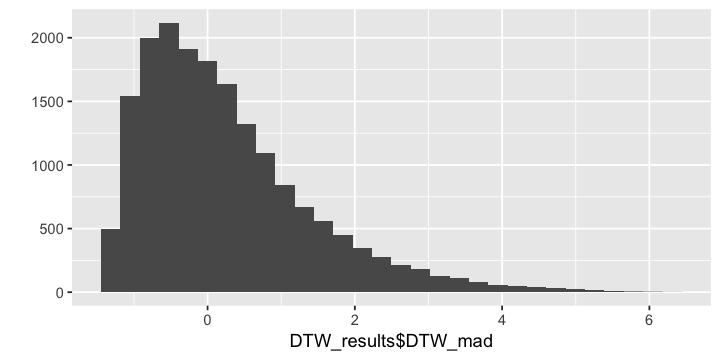

In [55]:
DTW_results$DTW_lScale <- scale(log(DTW_results$DTW))
DTW_results$DTW_scale <- scale(DTW_results$DTW)

M <- mad(DTW_results$DTW, center = median(DTW_results$DTW, na.rm = TRUE), na.rm=T)
DTW_results$DTW_mad <- (DTW_results$DTW-median(DTW_results$DTW, na.rm = TRUE))/M

qplot(DTW_results$DTW_mad)
write.table(file="./DTW_results.txt", DTW_results, sep="\t", quote=F, row.names=F)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

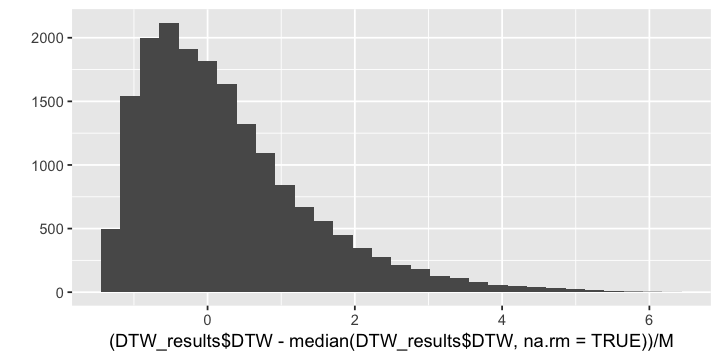

In [56]:
M <- mad(DTW_results$DTW, center = median(DTW_results$DTW, na.rm = TRUE), na.rm=T)
qplot((DTW_results$DTW-median(DTW_results$DTW, na.rm = TRUE))/M)

In [57]:
#options(repr.plot.width=5, repr.plot.height=3)
pdf(file="./DTW_histogram.pdf", wi=5, he=3.5)
ggplot(data=DTW_results, aes(x=DTW)) + 
    geom_histogram(bins=20, aes(fill=..x..), color='black') + 
    theme_bw() + 
    scale_fill_gradient2(low="cyan", high="orange", midpoint=median(DTW_results$DTW, na.rm=T)) +
    ylab("Count") + xlab("Time-Warping Distance")
dev.off()

Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

pdf 
  2

In [ ]:
#try some dynamic time warping

#kernel crashes -- memory req too high?
#over 64GB in swap, try rerun with 100 interpolation points
#still too much going on

require(dtw)
require(proxy)

#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists.dtw <- dist(splineBTx623.RN,method="DTW") #should make square, where dtwDist() is not
geneDistMatrix.dtw <- as.matrix( geneDists.dtw )

tsplineBTx623.RN <- data.frame(t(scale(splineBTx623.RN)))

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineBTx623.RN,
         clustering_distance_rows = geneDists.dtw,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Dynamic Time Warping")

In [ ]:
head(orth)

#use "No Gene" in maize1 or maize2 to count number of Sb-Zm orthologs
head(orth[(orth$maize1!="No Gene" | orth$maize2!="No Gene"),])
dim(orth[(orth$maize1!="No Gene" | orth$maize2!="No Gene"),])

In [ ]:
#create maize1 and maize2 subsets of orthology table
maize1 <- orth[(orth$maize1!="No Gene"),]
maize2 <- orth[(orth$maize2!="No Gene"),]
head(maize1)
head(maize2)

In [ ]:
### I made a mess.
# try to do a recip. lookup of orthologs
# if in ortho list, check in sorghum matrix
# if in sorghum, check in maize matrix

head(rownames(tsplineB73.RN)) #list of expressed maize genes
head(rownames(tsplineBTx623.RN)) #list of expressed sorghum genes

head(maize1$maize1) #list of maize1 maize orthologs
head(maize1$sorghum2) #list of maize1 sorghum orthologs

head(maize2$maize2) #list of maize2 maize orthologs
head(maize2$sorghum2) #list of maize1 sorghum orthologs

In [ ]:
head(match(maize1$maize1, rownames(tsplineB73.RN))) #match to find index of matches
length (match(maize1$maize1, rownames(tsplineB73.RN)))
head(which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))) ))
length (which(!is.na(match(maize1$maize1, rownames(tsplineB73.RN)))))
#which !is.na to take out NA values -- but why is the order of indicies changed?


In [ ]:
head(maize1$maize1[which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))))])
length(maize1$maize1[which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))))])

In [ ]:
# this is fugly code. is there a tidyverse way to get the same effect?
require (magrittr)

maize1$maize1 %>% match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize1$sorghum2[.] %>% 
      head ()
#much better
#take maize1 names, match to expressed gene set
#toss out NAs, then pull up names again

In [ ]:
require (magrittr) #for maize1 orthologs

SbZm1_recip_orth<- maize1$maize1 %>% 
      match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize1$sorghum2[.] %>% #find maize nonNAs
      match(. , rownames(tsplineBTx623.RN)) %>%
      {which( !is.na(.) )} %>% #check against sorghum nonNAs
      maize1$sorghum2[.] %>%
      match(., orth$sorghum2) %>%
      orth[.,] 
dim(SbZm1_recip_orth)
head(SbZm1_recip_orth)

In [ ]:
require (magrittr) #for maize2 orthologs

SbZm2_recip_orth<- maize2$maize2 %>% 
      match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize2$sorghum2[.] %>% #find maize nonNAs
      match(. , rownames(tsplineBTx623.RN)) %>%
      {which( !is.na(.) )} %>% #check against sorghum nonNAs
      maize2$sorghum2[.] %>%
      match(., orth$sorghum2) %>%
      orth[.,] 
dim(SbZm2_recip_orth)
head(SbZm2_recip_orth)

In [ ]:
#use maize1 Sb genes to subset and reorder Sb expression matrix
#use maize1 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize1.BTx623 <- tBTx623[match(maize1$sorghum2, rownames(tBTx623)),]

tB73 <- t(splineB73.RN)
maize1.B73 <- tB73[match(maize1$maize1, rownames(tB73)),]

head(maize1)
head(maize1.BTx623)
dim(maize1.BTx623)
head(maize1.B73)
dim(maize1.B73)

In [ ]:
match('Sobic.001G106200', rownames(maize1.BTx623))

In [ ]:
head(tBTx623)
head(maize1$sorghum2[2])
match(maize1$sorghum2[2], rownames(tBTx623))
head(t(tBTx623[match(maize1$sorghum2[2], rownames(tBTx623)),]))
head(maize1.BTx623[2,])

In [ ]:
#try running dtw for first orthogroup
require(dtw)

dtw.test <- dtw(scale(maize1.BTx623[644,]), scale(maize1.B73[644,]), keep=T)

options(repr.plot.width=6, repr.plot.height=6)
plot(dtw.test, type="twoway")
dtw.test
dtw.test$distance
dtw.test$normalizedDistance

In [ ]:
#try calucating distance for all orthopairs in maize1
dtw.dist <- dtw(t(maize1.BTx623)[,644], t(maize1.B73)[,644], distance.only=T)
summary(dtw.dist)

In [ ]:
require (dtw)
orthdist.dtw <- cbind(1, dtw(t(maize1.BTx623)[,1], t(maize1.B73)[,1], distance.only=T)$normalizedDistance)

for (ortho in 2:nrow(maize1.BTx623)) {
    orthdist.dtw <- rbind(orthdist.dtw, 
                          cbind(ortho, 
                                dtw(t(maize1.BTx623)[,ortho], t(maize1.B73)[,ortho], distance.only=T)$normalizedDistance))
}
dim(orthdist.dtw)
head(orthdist.dtw)

In [ ]:
dim(orthdist.dtw)
dim(maize1.BTx623)
tail(orthdist.dtw)

In [ ]:


for (ortho in 4929:nrow(maize1.BTx623)) {
    require(dtw)
    orthdist.dtw <- rbind(orthdist.dtw, 
                          cbind(ortho, 
                                dtw(t(maize1.BTx623)[,ortho], t(maize1.B73)[,ortho], distance.only=T)$normalizedDistance))
}

dim(orthdist.dtw)


In [ ]:
dim(maize1.BTx623)

require(ggplot2)
qplot(orthdist.dtw[,2])
min(orthdist.dtw[,2])

In [ ]:
#use maize2 Sb genes to subset and reorder Sb expression matrix
#use maize2 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize2.BTx623 <- tBTx623[tBTx623[maize2$sorghum2],]

tB73 <- t(splineB73.RN)
maize2.B73 <- tB73[tB73[maize2$maize2],]

head(maize2)
head(maize2.BTx623)
head(maize2.B73)

In [ ]:
#try calucating distance for all orthopairs in maize1
dtw.dist <- dtw(t(maize2.BTx623)[,50], t(maize2.B73)[,50], distance.only=T)
summary(dtw.dist)

In [ ]:
require (dtw)
orthdist2.dtw <- cbind(1, dtw(t(maize2.BTx623)[,1], t(maize2.B73)[,1], distance.only=T)$normalizedDistance)

for (ortho in 2:nrow(maize2.BTx623)) {
    orthdist2.dtw <- rbind(orthdist2.dtw, 
                          cbind(ortho, 
                                dtw(t(maize2.BTx623)[,ortho], t(maize2.B73)[,ortho], distance.only=T)$normalizedDistance))
}
dim(orthdist2.dtw)
head(orthdist2.dtw)

In [ ]:
require(ggplot2)
qplot(c(orthdist2.dtw[,2],orthdist.dtw[,2]), bins=5)

Need to construct ETU to Expression value matrix for each gene in B73 and BTx623
<br>Transpose count matrix
<br>For each gene in VSD count matrix:
<br><t>Create B73 ETU v Count
<br><t>Calculate correlation values
<br><t>Return correlation
<br>Histogram?
<br>Check high correlation genes for GO enrichment?

In [ ]:
# try to do some tree magic with dendextend
require (dendextend)
require (magrittr)

In [ ]:
dist.B73 <- as.dist((1 - cor(splineB73.RN)))


In [ ]:
dist.BTx623 <- as.dist((1 - cor(splineBTx623.RN)))


In [ ]:
dend.B73 <-  dist.B73 %>% # recall a distance matrix from above, 
         hclust(method = "average") %>% # on it compute hierarchical clustering using the "average" method, 
         as.dendrogram # turn that object into a dendrogram.

options(repr.plot.width=8, repr.plot.height=6)
dend.B73 %>% plot(main="B73 genes, unadjusted") # plot it

In [ ]:
dend.BTx623 <-  dist.BTx623 %>% # recall a distance matrix from above, 
         hclust(method = "average") %>% # on it compute hierarchical clustering using the "average" method, 
         as.dendrogram # turn that object into a dendrogram.

options(repr.plot.width=8, repr.plot.height=6)
dend.BTx623 %>% plot(main="BTx623 genes, unadjusted") # plot it

In [ ]:
#change maize names to sorghum orthologs (are duplicates permitted??)
#create tanglegram
head(SbZm1_recip_orth)
head(SbZm2_recip_orth)

# current labels
old.BTx623.labels <- labels(dend.BTx623)
old.B73.labels <- labels(dend.B73)
print("old B73")
head(old.B73.labels)

# match B73 names to sorghum orthologs for maize1 and maize2
new1.B73.labels <- old.B73.labels %>% 
                   match(., SbZm1_recip_orth$maize1) %>%
                   SbZm1_recip_orth$sorghum2[.] %>%
                   as.character()
print("B73 maize1 sorghum matches")
head (new1.B73.labels)

require(dplyr)
maize1.B73.labels <- new1.B73.labels %>%
                     {if_else(!is.na(.), #if it is not NA
                              new1.B73.labels, #keep the new label
                              old.B73.labels)} #otherwise, 

head (maize1.B73.labels)

#{which( is.na(.) )} %>%
#old.B73.labels[.] %>%
#match(., SbZm2_recip_orth$maize2) %>%

#SbZm1_recip_orth$sorghum2[.] %>%

#head()

# relabel dendrogram object with library names
#short.dend <- dend %>% set("labels", simple.labels)
#plot(dend)

In [ ]:
# relabel B73 dendrogram object with maize1 sorghum matches

dend.B73.relab1 <- dend.B73 %>% 
                    set ("labels", maize1.B73.labels)
plot(dend.B73.relab1)


In [ ]:
# check that it worked
changes <- dendlist(dend.BTx623, dend.B73.relab1)
pdf(file="./BTx623_B73_1.tanglegram.pdf", he=20, wi=20)
tanglegram(changes)
dev.off()

In [ ]:
#try the sort method -- didn't complete -- taking forever

pdf(file="./BTx623_B73_1.tanglegram.2.pdf", he=20, wi=20)
tanglegram(changes,
          sort=T,
          lwd=0.5,
          columns_width = c(3,5,3))
dev.off()

In [ ]:
inter <- intersect_trees(dend.BTx623,  dend.B73.relab1)

In [ ]:
## too hairy to understand
pdf(file="./BTx623_B73_1.tanglegram.2.pdf", he=20, wi=20)
tanglegram(inter,
          sort=T,
          lwd=0.5,
          columns_width = c(3,5,3))
dev.off()

In [ ]:
#maybe there is a more graceful way
#how about take the old labels
#if maize 1 match is not NA
#change value,
#else check maize 2,
#else don't change
require(dplyr)

maize12.B73.labels <- old.B73.labels %>% 
                       match(., SbZm1_recip_orth$maize1) %>%
                       SbZm1_recip_orth$sorghum2[.] %>%
                       as.character() %>%
                       {if_else(!is.na(.), #if it is not NA
                              ., #keep the new label
                              match(., SbZm2_recip_orth$maize2) %>%
                       SbZm2_recip_orth$sorghum2[.] %>%
                       as.character() %>%
                       {if_else(!is.na(.), #if it is not NA
                              ., #keep the new label
                              old.B73.labels)} #otherwise, revert to old label
head (old.B73.labels)
head (maize12.B73.labels)


In [ ]:
save.image(file="031818.RData")

In [ ]:
load(file="021918.RData")